In [1]:
!pip install PyPDF2
import PyPDF2
import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

In [21]:
filename = 'C:/Users/palad/mlspark/Files/Norfolk/Norfolk-DAO-Brady-List-1-25-2022.pdf'
open_filename = open(filename, 'rb')

ind_manifesto = PyPDF2.PdfFileReader(open_filename)

In [22]:
ind_manifesto.getDocumentInfo()

{'/Producer': 'Microsoft® Word 2016',
 '/Creator': 'Microsoft® Word 2016',
 '/CreationDate': "D:20220125100714-05'00'",
 '/ModDate': "D:20220125100714-05'00'"}

In [23]:
total_pages = ind_manifesto.numPages
total_pages

6

In [24]:
!pip install textract

In [25]:
import textract

In [26]:
count = 0
text  = ''

# Lets loop through, to read each page from the pdf file
while(count < total_pages):
    # Get the specified number of pages in the document
    mani_page  = ind_manifesto.getPage(count)
    # Process the next page
    count += 1
    # Extract the text from the page
    text += mani_page.extractText()

In [27]:
if text != '':
    text = text
    
else:
    textract.process(open_filename, method='tesseract', encoding='utf-8', langauge='eng' )    

In [28]:
!pip install autocorrect

In [29]:
from autocorrect import Speller
from nltk.tokenize import word_tokenize


def to_lower(text):

    """
    Converting text to lower case as in, converting "Hello" to  "hello" or "HELLO" to "hello".
    """
    
    # Specll check the words
    spell  = Speller(lang='en')
    
    texts = spell(text)
    
    return ' '.join([w.lower() for w in word_tokenize(text)])

lower_case = to_lower(text)
print(lower_case)

the commonwealth of massachusetts office of the district attorney for the norfolk district january 25 , 2022 andrew quemere aquemere0 @ gmail.com sent via email re : public records request dear mr. quemere : this responds to your january 10 , 2022 records request to the norfolk district attorney ’ s office ( the “ ndao ) in which you requested under the massachusetts public records law , g.l . c. 66 , §10 : 1 . the office 's brady list , which refers to a list of law enforc ement officers who have credibility issues or other concerns that might need to be disclosed to defendants in criminal cases 2 . all brady information , meaning all records concerning individual law enforcement officers that might need to be , or have been , disc losed to defendants in criminal cases 3 . all communications with criminal defendants and/or defense counsel advising them of the existence of brady information or an officer 's placement on a brady list 4 . all communications with police departments or ind

In [30]:
import pandas as pd

In [31]:
import nltk
import re
import string
from nltk.corpus import stopwords, brown
from nltk.tokenize import word_tokenize, sent_tokenize, RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from autocorrect import spell

In [32]:
def clean_text(lower_case):
    # split text phrases into words
    words  = nltk.word_tokenize(lower_case)
    
    
    # Create a list of all the punctuations we wish to remove
    punctuations = ['.', ',', '/', '!', '?', ';', ':', '(',')', '[',']', '-', '_', '%']
    
    # Remove all the special characters
    punctuations = re.sub(r'\W', ' ', str(lower_case))
    
    # Initialize the stopwords variable, which is a list of words ('and', 'the', 'i', 'yourself', 'is') that do not hold much values as key words
    stop_words  = stopwords.words('english')
    
    # Getting rid of all the words that contain numbers in them
    w_num = re.sub('\w*\d\w*', '', lower_case).strip()
    
    # remove all single characters
    lower_case = re.sub(r'\s+[a-zA-Z]\s+', ' ', lower_case)
    
    # Substituting multiple spaces with single space
    lower_case = re.sub(r'\s+', ' ', lower_case, flags=re.I)
    
    # Removing prefixed 'b'
    lower_case = re.sub(r'^b\s+', '', lower_case)
    
    
    
    # Removing non-english characters
    lower_case = re.sub(r'^b\s+', '', lower_case)
    
    # Return keywords which are not in stop words 
    keywords = [word for word in words if not word in stop_words  and word in punctuations and  word in w_num]
    
    return keywords

In [33]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
# Lemmatize the words
wordnet_lemmatizer = WordNetLemmatizer()

lemmatized_word = [wordnet_lemmatizer.lemmatize(word) for word in clean_text(lower_case)]

# lets print out the output from our function above and see how the data looks like
clean_data = ' '.join(lemmatized_word)
print(clean_data)

commonwealth massachusetts office district attorney norfolk district january andrew quemere sent via email public record request dear quemere responds january record request norfolk district attorney office ndao requested massachusetts public record law office brady list refers list law enforc ement officer credibility issue concern might need disclosed defendant criminal case brady information meaning record concerning individual law enforcement officer might need disc losed defendant criminal case communication criminal defendant defense counsel advising existence brady information officer placement brady list communication police department individual officer regarding existence disclosure brady information officer placement potential placement brady list ndao responds request follows office brady list refers list law enforcement offi cer credibility issue concern might need disclosed defendant criminal case ndao interprets request seeking ndao list police officer massachusetts stat

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\palad\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\palad\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [34]:
df = pd.DataFrame([clean_data])
df.columns = ['script']
df.index = ['Itula']
df

,script
Itula,commonwealth massachusetts office district att...


In [35]:
#  Counting the occurrences of tokens and building a sparse matrix of documents x tokens.
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

corpus = df.script
vect = CountVectorizer(stop_words='english')

# Transforms the data into a bag of words
data_vect = vect.fit_transform(corpus)

In [36]:
feature_names = vect.get_feature_names()
data_vect_feat = pd.DataFrame(data_vect.toarray(), columns=feature_names)
data_vect_feat.index = df.index
data_vect_feat

,access,accordance,actual,adam,addi,additional,additionally,advised,advising,alternatively,...,walpole,week,weymouth,william,wilmot,wilson,wish,wosny,zopatti,zorzi
Itula,3,2,2,1,1,2,1,2,2,1,...,1,1,1,3,1,1,2,1,1,1


In [37]:
data = data_vect_feat.transpose()
data

,Itula
access,3
accordance,2
actual,2
adam,1
addi,1
...,...
wilson,1
wish,2
wosny,1
zopatti,1


In [38]:
import matplotlib.pyplot as plt
import seaborn as sn

# Find the top 1000 words written in the manifesto
top_dict = {}
for c in data.columns:
    top = data[c].sort_values(ascending=False)
    top_dict[c]= list(zip(top.index, top.values))

    
for x in list(top_dict)[0:100]:
    print("key {}, value {} ".format(x,  top_dict[x]))
    

key Itula, value [('msp', 44), ('request', 21), ('ndao', 21), ('officer', 17), ('record', 14), ('hour', 12), ('brady', 12), ('list', 10), ('police', 9), ('law', 9), ('office', 8), ('communication', 8), ('individual', 8), ('estimate', 7), ('information', 7), ('placement', 6), ('counsel', 6), ('criminal', 6), ('district', 6), ('massachusetts', 6), ('case', 6), ('defendant', 6), ('defense', 6), ('file', 6), ('need', 5), ('david', 5), ('norfolk', 5), ('approximately', 5), ('matthew', 5), ('attorney', 5), ('paul', 4), ('existence', 4), ('requested', 4), ('sgt', 4), ('needham', 4), ('john', 4), ('department', 4), ('michael', 4), ('notice', 4), ('kevin', 4), ('cost', 3), ('greater', 3), ('redacting', 3), ('concerning', 3), ('complete', 3), ('disclosed', 3), ('robert', 3), ('enforcement', 3), ('fee', 3), ('required', 3), ('difficulty', 3), ('email', 3), ('responsive', 3), ('determined', 3), ('access', 3), ('compiling', 3), ('provide', 3), ('minute', 3), ('william', 3), ('ass', 3), ('trooper', 

In [39]:
# Look at the most common top words --> add them to the stop word list
from collections import Counter

# Let's first pull out the top 100 words for each comedian
words = []
for president in data:
    top = [word for (word, count) in top_dict[president]]
    for t in top:
        words.append(t)

print(words[:10])

['msp', 'request', 'ndao', 'officer', 'record', 'hour', 'brady', 'list', 'police', 'law']


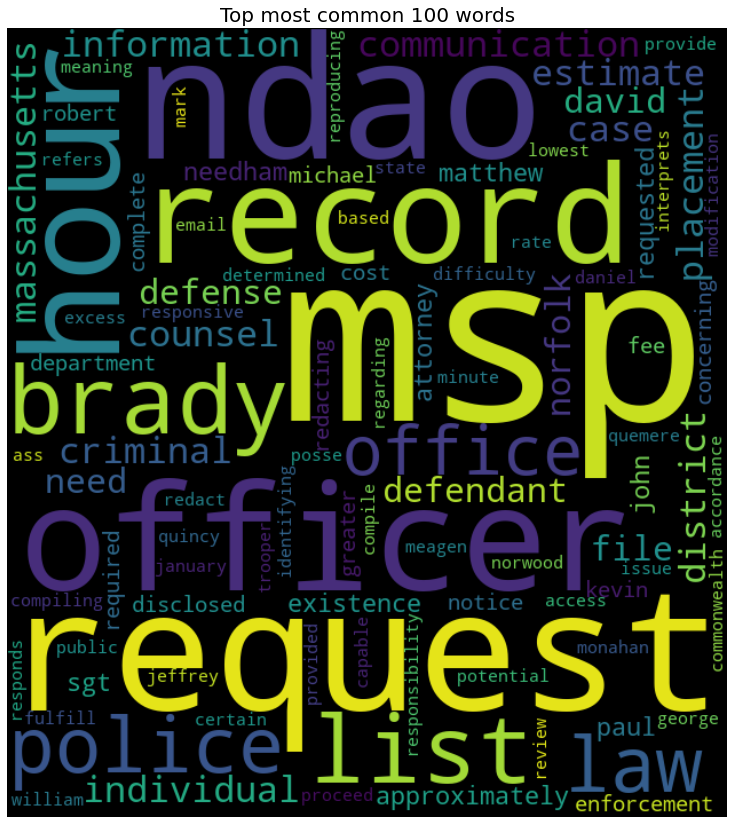

In [40]:
!pip install wordcloud
from wordcloud import WordCloud, STOPWORDS
import imageio
import matplotlib.pyplot as plt
import nltk

# Image used in which our world cloud output will be
img1 = imageio.imread("C:/Users/palad/mlspark/Files/Middlesex/test.jpg")
hcmask1 = img1

# Get 100 words based on the 
words_except_stop_dist = nltk.FreqDist(w for w in words[:100]) 
wordcloud = WordCloud(stopwords=set(STOPWORDS),background_color='black',mask=hcmask1).generate(" ".join(words_except_stop_dist))
plt.imshow(wordcloud,interpolation = 'bilinear')
fig=plt.gcf()
fig.set_size_inches(10,12)
plt.axis('off')
plt.title("Top most common 100 words",fontsize=20)
plt.tight_layout(pad=0)
plt.savefig('Brady_top_100.jpeg')

In [41]:
!pip install vaderSentiment
!pip install textblob

In [42]:
from collections import defaultdict
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from textblob import TextBlob

In [43]:
blob = TextBlob(clean_data)
blob.sentiment

Sentiment(polarity=-0.04498132586367881, subjectivity=0.43097572362278236)

In [44]:
# Importing all the necessary libraries
from nltk.cluster.util import cosine_distance
from nltk.tokenize import sent_tokenize
import numpy as np
import networkx as nx
import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

In [45]:
def sentence_similarity(sent1, sent2, stopwords=None):
    if stopwords is None:
        stopwords = []
 
    sent1 = [w.lower() for w in sent1]
    sent2 = [w.lower() for w in sent2]
 
    all_words = list(set(sent1 + sent2))
 
    vector1 = [0] * len(all_words)
    vector2 = [0] * len(all_words)
 
    # build the vector for the first sentence
    for w in sent1:
        if w in stopwords:
            continue
        vector1[all_words.index(w)] += 1
 
    # build the vector for the second sentence
    for w in sent2:
        if w in stopwords:
            continue
        vector2[all_words.index(w)] += 1
 
    return 1 - cosine_distance(vector1, vector2)
 
# One out of 5 words differ => 0.8 similarity
print(sentence_similarity("This is a good sentence".split(), "This is a bad sentence".split()))
 
# One out of 2 non-stop words differ => 0.5 similarity
print(sentence_similarity("This is a good sentence".split(), "This is a bad sentence".split(), stopwords.words('english')))
 
# 0 out of 2 non-stop words differ => 1 similarity (identical sentences)
print(sentence_similarity("This is a good sentence".split(), "This is a good sentence".split(), stopwords.words('english')))
 
# Completely different sentences=> 0.0
print(sentence_similarity("This is a good sentence".split(), "I want to go to the market".split(), stopwords.words('english')))

0.7999999999999998
0.4999999999999999
0.9999999999999998
0.0


In [46]:
#print(sentences)

# get the english list of stopwords
#stop_words = stopwords.words('english')
 
def build_similarity_matrix(lower_case, stopwords=None):
    # Create an empty similarity matrix
    S = np.zeros([len(lower_case), len(lower_case)])
 
 
    for idx1 in range(len(lower_case)):
        for idx2 in range(len(lower_case)):
            if idx1 == idx2:
                continue
 
            S[idx1][idx2] = sentence_similarity(lower_case[idx1], lower_case[idx2], stop_words)
 
    # normalize the matrix row-wise
    for idx in range(len(S)):
        S[idx] /= S[idx].sum()
 
    return S

In [47]:
#len(sentences)
#S = build_similarity_matrix(sentences, stop_words)    
#S

In [48]:
def generate_summary(lower_case, top_n=5):
    # Remove all the stopwords in the document
    stop_words = stopwords.words('english')
    summarize_text = []
    
    
    
    #Read text and tokenize
    #lower_case  = nltk.word_tokenize(lower_case)
    
   
    
    #Generate similarity matrix across sentences
    sentence_similarity  = build_similarity_matrix((lower_case, stop_words))
    
    #Rank sentences in similarity matrix
    sentence_similiraty_graph = nx.from_numpy_array(sentence_similarity)
    scores = nx.pagerank(sentence_similiraty_graph)
    
    
    #Sort the rank and pick top sentences
    ranked_sentence = sorted(((scores[i],s) for i,s in enumerate(lower_case)), reverse=True)    
    print("Indexes of top ranked_sentence order are ", ranked_sentence) 
    
    for i in range(top_n):
        summarize_text.append(' '.join(ranked_sentence[i][1]))
        
    #Output the summarized text
    print('Summarized Text: \n', '. '.join(summarize_text))
       

In [49]:
!pip install gensim==3.4.0
from gensim.summarization.summarizer import summarize

C:\Users\palad\anaconda3\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [50]:
# Print out our summarized text of the document which was converted to lower case, remember we could have opted to remove stopwords as well.

summary=summarize(lower_case, word_count=50)

In [51]:
# Gensim
!pip install pyLDAvis
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# Plotting tools
import pyLDAvis
#import graphlab as gl
#import pyLDAvis.graphlab
import pyLDAvis.gensim_models as gensimvis

# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

In [52]:
data  = []
data.append(clean_text(lower_case))

C:\Users\palad\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [53]:
# This time we use spacy for lemmatizarion 
!pip install spacy
!pip3 install https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-2.2.0/en_core_web_sm-2.2.0.tar.gz
!python -m spacy download en_core_web_lg
!python -m spacy download en_core_web_sm
!python -m spacy download en
import spacy

# Second lemmatization of our data
def lemmatization(data, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_output = []
    for sent in data:
        doc = nlp(" ".join(sent)) 
        texts_output.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_output

nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

# Lemmatize keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

C:\Users\palad\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


  Created wheel for en-core-web-sm: filename=en_core_web_sm-2.2.0-py3-none-any.whl size=12019121 sha256=c44492a3f4522ee4af203a6b0cbbe8b253d8fdf9a6773f985fbfcf8cc52fed7c
  Stored in directory: c:\users\palad\appdata\local\pip\cache\wheels\fc\31\e9\092e6f05b2817c9cb45804a3d1bf2b9bf6575742c01819337c
Successfully built en-core-web-sm
  Attempting uninstall: en-core-web-sm
    Found existing installation: en-core-web-sm 3.4.1
    Uninstalling en-core-web-sm-3.4.1:
      Successfully uninstalled en-core-web-sm-3.4.1


[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')
  Attempting uninstall: en-core-web-sm
    Found existing installation: en-core-web-sm 2.2.0
    Uninstalling en-core-web-sm-2.2.0:
      Successfully uninstalled en-core-web-sm-2.2.0
[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


[!] As of spaCy v3.0, shortcuts like 'en' are deprecated. Please use the full
pipeline package name 'en_core_web_sm' instead.
[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


C:\Users\palad\anaconda3\lib\site-packages\spacy\language.py:1895: UserWarning: [W123] Argument disable with value ['parser', 'ner'] is used instead of ['senter'] as specified in the config. Be aware that this might affect other components in your pipeline.
  warnings.warn(


In [54]:
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)

# Create Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]


# View
print(corpus[:1])

[[(0, 3), (1, 2), (2, 2), (3, 1), (4, 2), (5, 1), (6, 4), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 5), (13, 3), (14, 1), (15, 2), (16, 1), (17, 2), (18, 1), (19, 1), (20, 2), (21, 6), (22, 1), (23, 2), (24, 1), (25, 1), (26, 8), (27, 5), (28, 3), (29, 5), (30, 1), (31, 2), (32, 1), (33, 3), (34, 6), (35, 2), (36, 6), (37, 1), (38, 1), (39, 1), (40, 6), (41, 6), (42, 1), (43, 3), (44, 3), (45, 1), (46, 3), (47, 1), (48, 3), (49, 1), (50, 1), (51, 1), (52, 3), (53, 1), (54, 3), (55, 7), (56, 1), (57, 2), (58, 1), (59, 2), (60, 3), (61, 6), (62, 1), (63, 1), (64, 1), (65, 2), (66, 1), (67, 3), (68, 12), (69, 1), (70, 1), (71, 2), (72, 1), (73, 1), (74, 1), (75, 8), (76, 1), (77, 3), (78, 2), (79, 2), (80, 1), (81, 2), (82, 9), (83, 1), (84, 1), (85, 1), (86, 1), (87, 1), (88, 4), (89, 1), (90, 3), (91, 1), (92, 2), (93, 3), (94, 2), (95, 1), (96, 20), (97, 5), (98, 1), (99, 4), (100, 1), (101, 6), (102, 13), (103, 1), (104, 1), (105, 1), (106, 1), (107, 1), (108, 1), (109, 2), (110,

C:\Users\palad\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [55]:
# LDA model

lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus, id2word=id2word, alpha='auto', num_topics=20, random_state=100,
                                           update_every=1, passes=20, per_word_topics=True)

C:\Users\palad\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
C:\Users\palad\anaconda3\lib\site-packages\gensim\models\ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
C:\Users\palad\anaconda3\lib\site-packages\gensim\models\ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + 

In [56]:
# Lets view the topics in our model
print(lda_model.print_topics())
doc_lda  = lda_model[corpus]

[(0, '0.006*"request" + 0.006*"ndao" + 0.006*"officer" + 0.006*"hour" + 0.006*"record" + 0.006*"take" + 0.006*"defendant" + 0.006*"individual" + 0.006*"law" + 0.006*"police"'), (1, '0.006*"request" + 0.006*"ndao" + 0.006*"record" + 0.006*"hour" + 0.006*"communication" + 0.006*"individual" + 0.006*"officer" + 0.006*"police" + 0.006*"take" + 0.006*"provide"'), (2, '0.006*"pr" + 0.006*"proceed" + 0.006*"payable" + 0.006*"person" + 0.006*"physical" + 0.006*"placement" + 0.006*"police" + 0.006*"possess" + 0.006*"possession" + 0.006*"ovide"'), (3, '0.006*"pr" + 0.006*"proceed" + 0.006*"payable" + 0.006*"person" + 0.006*"physical" + 0.006*"placement" + 0.006*"police" + 0.006*"possess" + 0.006*"possession" + 0.006*"ovide"'), (4, '0.006*"request" + 0.006*"ndao" + 0.006*"record" + 0.006*"hour" + 0.006*"officer" + 0.006*"police" + 0.006*"law" + 0.006*"communication" + 0.006*"take" + 0.006*"individual"'), (5, '0.006*"ndao" + 0.006*"request" + 0.006*"officer" + 0.006*"record" + 0.006*"hour" + 0.006

C:\Users\palad\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [57]:
# Print model perplexity
print('\nPerplexity:', lda_model.log_perplexity(corpus))


# Coherence Score

coherence_model_lda = CoherenceModel(lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('Coherence Score:', coherence_lda)

C:\Users\palad\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
C:\Users\palad\anaconda3\lib\site-packages\gensim\models\ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)



Perplexity: -5.648736322611228
Coherence Score: 0.3422697787691377


In [58]:
import pyLDAvis.gensim_models as gensimvis
pyLDAvis.enable_notebook()
# feed the LDA model into the pyLDAvis instance
lda_viz = gensimvis.prepare(lda_model, corpus, id2word)

C:\Users\palad\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [59]:
lda_viz

C:\Users\palad\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x    y  topics  cluster       Freq
topic                                           
13    -0.081134 -0.0       1        1  99.913073
9      0.002313  0.0       2        1   0.005476
14     0.004039 -0.0       3        1   0.004734
6      0.004074 -0.0       4        1   0.004732
15     0.004076 -0.0       5        1   0.004732
10     0.004159  0.0       6        1   0.004729
17     0.004270  0.0       7        1   0.004724
4      0.004320  0.0       8        1   0.004721
1      0.004343 -0.0       9        1   0.004719
18     0.004361  0.0      10        1   0.004717
5      0.004396  0.0      11        1   0.004715
19     0.004481  0.0      12        1   0.004702
7      0.004492 -0.0      13        1   0.004700
8      0.004493  0.0      14        1   0.004699
12     0.004507  0.0      15        1   0.004695
11     0.004533  0.0      16        1   0.004685
0      0.004568 -0.0      17        1   0.004599
16     0.004569 -0.0      18        1   0.003616
3      0.004569 -0.0      19        1   0.003616
2      0.004569 -0.0      20        1   0.003616, topic_info=              Term       Freq      Total Category  logprob  loglift
128        request  24.000000  24.000000  Default  30.0000  30.0000
96            ndao  19.000000  19.000000  Default  29.0000  29.0000
121         record  13.000000  13.000000  Default  28.0000  28.0000
102        officer  12.000000  12.000000  Default  27.0000  27.0000
68            hour  11.000000  11.000000  Default  26.0000  26.0000
..             ...        ...        ...      ...      ...      ...
25           check   0.000095   1.031914  Topic20  -5.1059   0.9380
26   communication   0.000095   7.895922  Topic20  -5.1059  -1.0969
27         compile   0.000095   4.954239  Topic20  -5.1059  -0.6308
28        complete   0.000095   2.993012  Topic20  -5.1059  -0.1269
29         concern   0.000095   4.953913  Topic20  -5.1059  -0.6308

[1373 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
0         1  1.002338      access
1         1  0.993776  accordance
2         1  0.993806      actual
3         1  0.969118        addi
4         1  0.993774  additional
...     ...       ...         ...
159       1  1.002401     trooper
160       1  0.969153      unduly
161       1  0.969116      update
162       1  0.969228      volume
163       1  0.969115        week

[140 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[14, 10, 15, 7, 16, 11, 18, 5, 2, 19, 6, 20, 8, 9, 13, 12, 1, 17, 4, 3])